In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [3]:
pip install plotly

  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/a8/07/72953cf70e3bd3a24cbc3e743e6f8539abe6e3e6d83c3c0c83426eaffd39/plotly-5.18.0-py3-none-any.whl.metadata
  Obtaining dependency information for tenacity>=6.2.0 from https://files.pythonhosted.org/packages/f4/f1/990741d5bb2487d529d20a433210ffa136a367751e454214013b441c4575/tenacity-8.2.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB 653.6 kB/s eta 0:00:24
   ---------------------------------------- 0.1/15.6 MB 1.2 MB/s eta 0:00:13
    --------------------------------------- 0.3/15.6 MB 2.3 MB/s eta 0:00:07
   - -------------------------------------- 0.7/15.6 MB 3.9 MB/s eta 0:00:04
   --- ------------------------------------ 1.5/15.6 MB 6.3 MB/s eta 0:00:03
   ------ --------------------------------- 2.7/15.6 MB 9.6 MB/s et


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
#load dataset
df = pd.read_csv('german_credit_data.csv')
#C:\Users\mayuk\OneDrive - Georgia State University\Documents\ML\ML Projects\Credit-Risk-Assessment-main
data.head() # to display the first 5 lines of loaded data

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age group
0,0,67,male,skilled,own,none,little,1169,6,radio/TV,good,senior
1,1,22,female,skilled,own,little,moderate,5951,48,radio/TV,bad,student
2,2,49,male,unskilled and resident,own,little,none,2096,12,education,good,adult
3,3,45,male,skilled,free,little,little,7882,42,furniture/equipment,good,adult
4,4,53,male,skilled,free,little,little,4870,24,car,bad,adult


In [42]:
print(df.shape)  #rows and columns

(1000, 11)


In [43]:
df.info

<bound method DataFrame.info of      Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0             0   67    male    2     own             NaN           little   
1             1   22  female    2     own          little         moderate   
2             2   49    male    1     own          little              NaN   
3             3   45    male    2    free          little           little   
4             4   53    male    2    free          little           little   
..          ...  ...     ...  ...     ...             ...              ...   
995         995   31  female    1     own          little              NaN   
996         996   40    male    3     own          little           little   
997         997   38    male    2     own          little              NaN   
998         998   23    male    2    free          little           little   
999         999   27    male    2     own        moderate         moderate   

     Credit amount  Duration   

In [44]:
df.describe

<bound method NDFrame.describe of      Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0             0   67    male    2     own             NaN           little   
1             1   22  female    2     own          little         moderate   
2             2   49    male    1     own          little              NaN   
3             3   45    male    2    free          little           little   
4             4   53    male    2    free          little           little   
..          ...  ...     ...  ...     ...             ...              ...   
995         995   31  female    1     own          little              NaN   
996         996   40    male    3     own          little           little   
997         997   38    male    2     own          little              NaN   
998         998   23    male    2    free          little           little   
999         999   27    male    2     own        moderate         moderate   

     Credit amount  Duration 

In [45]:
df.isnull().sum().sort_values(ascending=False)

Checking account    394
Saving accounts     183
Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [46]:
df.duplicated().sum()

0

In [47]:
columns = df.columns.to_list()
for col in columns:
    unique_values = df[col].unique()
    numeric = pd.api.types.is_numeric_dtype(df[col])
    print(f"{col} ({df[col].dtype})")
    
    if numeric:
        unique_values = np.sort(unique_values)
        
    if numeric and len(unique_values) > 20:
        print(unique_values[:10], " ... ", unique_values[-10:])
    else:
        print(unique_values)
        
    print("\n")

Unnamed: 0 (int64)
[0 1 2 3 4 5 6 7 8 9]  ...  [990 991 992 993 994 995 996 997 998 999]


Age (int64)
[19 20 21 22 23 24 25 26 27 28]  ...  [62 63 64 65 66 67 68 70 74 75]


Sex (object)
['male' 'female']


Job (int64)
[0 1 2 3]


Housing (object)
['own' 'free' 'rent']


Saving accounts (object)
[nan 'little' 'quite rich' 'rich' 'moderate']


Checking account (object)
['little' 'moderate' nan 'rich']


Credit amount (int64)
[250 276 338 339 343 362 368 385 392 409]  ...  [14318 14421 14555 14782 14896 15653 15672 15857 15945 18424]


Duration (int64)
[ 4  5  6  7  8  9 10 11 12 13]  ...  [36 39 40 42 45 47 48 54 60 72]


Purpose (object)
['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


Risk (object)
['good' 'bad']




In [48]:
df["Saving accounts"] = data["Saving accounts"].fillna("none")
df["Checking account"] = data["Checking account"].fillna("none")

In [49]:
df["Job"] = df["Job"].map({
    0: "unskilled and non-resident",
    1: "unskilled and resident",
    2: "skilled",
    3: "highly skilled"
})


In [50]:
numeric_features = df.select_dtypes(include=[int, float]).columns.to_list()
categorical_features = list(set(df.drop("Risk", axis=1).columns) - set(numeric_features))

In [51]:
df["Sex"].value_counts(normalize=True)

Sex
male      0.69
female    0.31
Name: proportion, dtype: float64

In [59]:
# Data filtering
male_age = df.loc[df["Sex"] == "male", "Age"]
female_age = df.loc[df["Sex"] == "female", "Age"]
all_genders_age = df["Age"]

# Create histograms using plotly.express
fig = px.histogram(df, x="Age", color="Sex", histnorm="percent", barmode="overlay",
                  # color_discrete_map={"male": "rgba(0, 87, 233, 0.6)", "female": "rgba(255, 0, 189, 0.6)"},
                   #facet_col="Sex", facet_col_wrap=2)

# Update layout
fig.update_layout(title="Distribution of Age by Gender", title_x=0.5, bargap=0.05)

# Show the plot
fig.show()



SyntaxError: '(' was never closed (1324819561.py, line 7)

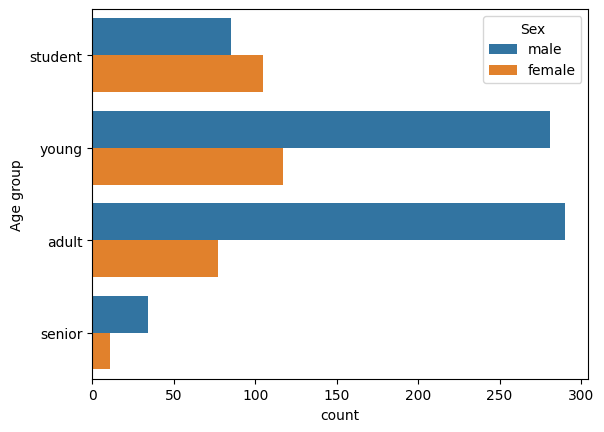

In [53]:
labels = ("student", "young", "adult", "senior")
groups = pd.cut(df["Age"], labels=labels, bins=(18, 25, 35, 60, 120), ordered=True)
df["Age group"] = groups

sns.countplot(data=df, y="Age group", hue="Sex")
plt.show()

In [54]:
fig = px.histogram(data_frame=df, x="Purpose", color="Sex", histnorm="percent", barmode="group", width=800)
fig.update_layout(title="Distribution of Purpose by Sex", title_x=0.5)
fig.show()


In [55]:
fig = px.box(data_frame=df, x="Purpose", y="Credit amount", color="Sex", width=900)
fig.update_layout(title="Credit amount by Purpose and Risk", title_x=0.5)
fig.show()

In [56]:

# Debugging: Print a few rows of the DataFrame to check the data
print(df.head())

# Create the histogram
fig = px.histogram(data_frame=df, x="Purpose", color="Sex", histnorm="percent", barmode="group", width=800)

# Update layout
fig.update_layout(title="Distribution of Purpose by Sex", title_x=0.5)

# Debugging: Print information about the figure
print(fig)

# Show the plot
fig.show()


   Unnamed: 0  Age     Sex                     Job Housing Saving accounts  \
0           0   67    male                 skilled     own            none   
1           1   22  female                 skilled     own          little   
2           2   49    male  unskilled and resident     own          little   
3           3   45    male                 skilled    free          little   
4           4   53    male                 skilled    free          little   

  Checking account  Credit amount  Duration              Purpose  Risk  \
0           little           1169         6             radio/TV  good   
1         moderate           5951        48             radio/TV   bad   
2             none           2096        12            education  good   
3           little           7882        42  furniture/equipment  good   
4           little           4870        24                  car   bad   

  Age group  
0    senior  
1   student  
2     adult  
3     adult  
4     adult  
Fi

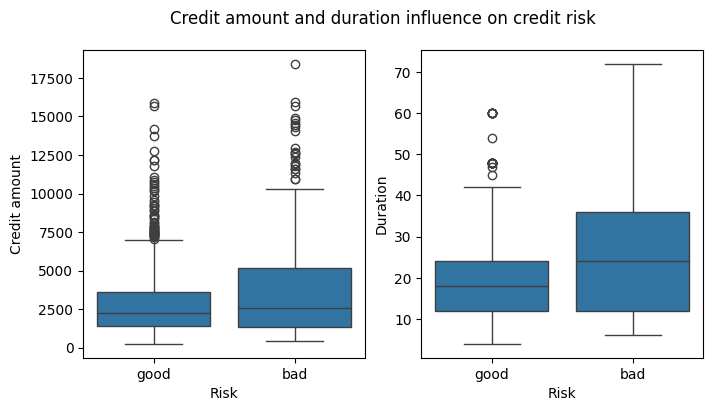

In [60]:
#Risk Analysis
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 4))
sns.boxplot(data=df, x="Risk", y="Credit amount", ax=ax0)
sns.boxplot(data=df, x="Risk", y="Duration", ax=ax1)
fig.suptitle("Credit amount and duration influence on credit risk")
fig.show()

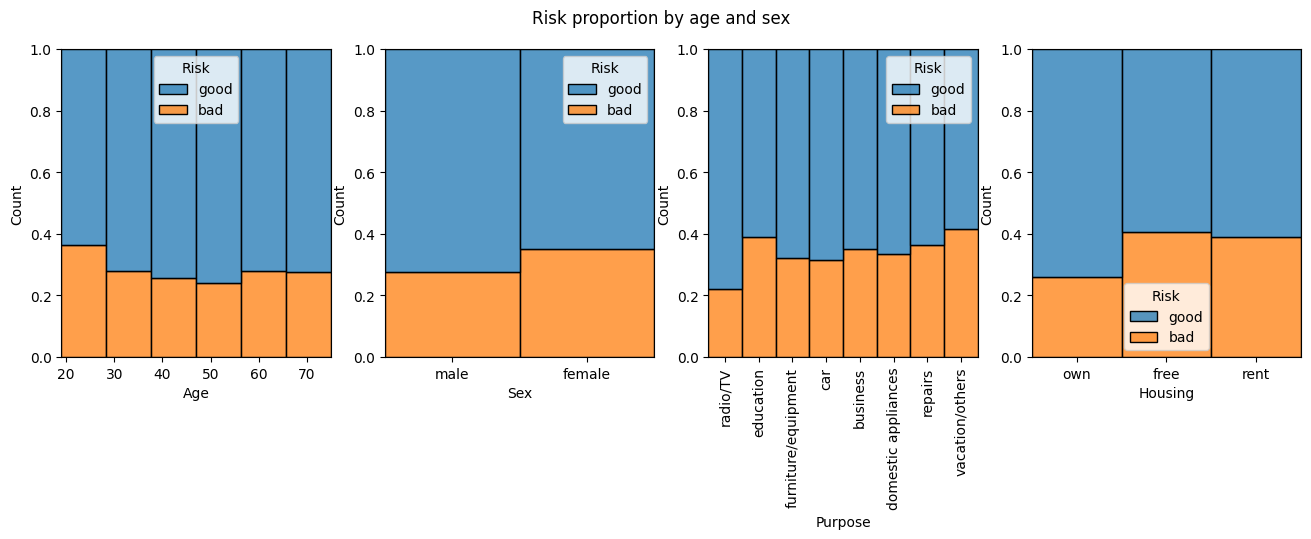

In [61]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(16, 4))
sns.histplot(data=df, x="Age", hue="Risk", multiple="fill", bins=6, ax=ax0)
sns.histplot(data=df, x="Sex", hue="Risk", multiple="fill", ax=ax1)
sns.histplot(data=df, x="Purpose", hue="Risk", multiple="fill", ax=ax2)
sns.histplot(data=df, x="Housing", hue="Risk", multiple="fill", ax=ax3)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation= 90)
fig.suptitle("Risk proportion by age and sex")
plt.show()

In [ ]:
#After running this code, your DataFrame df will have three additional binary columns indicating whether each individual's 
#"Age," "Duration," and "Credit amount" are greater than or equal to the respective medians.

In [65]:
# Calculate mean values
mean_values = df[["Age_gt_median", "Duration_gt_median", "Credit_amount_gt_median"]].mean()

# Print or use mean_values as needed
print(mean_values)

Age_gt_median              0.517
Duration_gt_median         0.567
Credit_amount_gt_median    0.500
dtype: float64


In [66]:
#Data Preprocessing and Feature Engineering
df["Age_gt_median"] = df["Age"].map(lambda x: (x >= df["Age"].median()).astype(int))
df["Duration_gt_median"] = df["Duration"].map(lambda x: (x >= df["Duration"].median()).astype(int))
df["Credit_amount_gt_median"] = df["Credit amount"].map(lambda x: (x >= df["Credit amount"].median()).astype(int))


In [67]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk',
       'Age group', 'Age_gt_median', 'Duration_gt_median',
       'Credit_amount_gt_median'],
      dtype='object')

In [68]:
df_pre = df.copy()


In [69]:
def get_outliers(df, feature, iqr_threshold=1.5):
    q1 = np.percentile(df[feature], 25)
    q3 = np.percentile(df[feature], 75)
    iqr = q3 - q1
    return df[(df[feature] < (q1 - iqr_threshold * iqr)) | (df[feature] > (q3 + iqr_threshold * iqr))]

numeric_features = df_pre.select_dtypes(include=[int, float]).columns.to_list()
for feature in numeric_features:
    nouts = len(get_outliers(df_pre, feature))
    if nouts > 0:
        print("%s: %d" % (feature, nouts))

Age: 23
Credit amount: 72
Duration: 70


In [70]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(drop="first", sparse=False)
onehot_features = ["Sex", "Job", "Housing", "Saving accounts", "Checking account", "Purpose", "Risk", "Age group"]
X_onehot = onehot.fit_transform(df_pre[onehot_features])
df_onehot = pd.DataFrame(data=X_onehot, columns=onehot.get_feature_names_out(onehot.feature_names_in_))
df_onehot.head()

,Sex_male,Job_skilled,Job_unskilled and non-resident,Job_unskilled and resident,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_none,Saving accounts_quite rich,Saving accounts_rich,...,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_good,Age group_senior,Age group_student,Age group_young
0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
df_pre = df.drop(onehot_features, axis=1)
df_pre = pd.concat((df_pre, df_onehot), axis=1)

In [72]:
df_pre.head()

,Unnamed: 0,Age,Credit amount,Duration,Age_gt_median,Duration_gt_median,Credit_amount_gt_median,Sex_male,Job_skilled,Job_unskilled and non-resident,...,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_good,Age group_senior,Age group_student,Age group_young
0,0,67,1169,6,1,0,0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1,22,5951,48,0,1,1,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,49,2096,12,1,0,0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,45,7882,42,1,1,1,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,53,4870,24,1,1,1,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
#transform Risk_good into Risk_bad to keep our event of interest encoded as the positive class.
df_pre["Risk_bad"] = (df_pre["Risk_good"] + 1) % 2
df_pre.drop(["Risk_good"], axis=1, inplace=True)

In [74]:
df_pre.head()

,Unnamed: 0,Age,Credit amount,Duration,Age_gt_median,Duration_gt_median,Credit_amount_gt_median,Sex_male,Job_skilled,Job_unskilled and non-resident,...,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Age group_senior,Age group_student,Age group_young,Risk_bad
0,0,67,1169,6,1,0,0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,22,5951,48,0,1,1,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2,49,2096,12,1,0,0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,45,7882,42,1,1,1,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,53,4870,24,1,1,1,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [75]:
#Standardization
#Standardization of the dataset is a common requirement for many machine learning estimators, so we will apply robust scaling to our data.
#The robust scaling method scales the data according to a specified quantile range, being a scaling method robust to outliers.

df_pre.columns

Index(['Unnamed: 0', 'Age', 'Credit amount', 'Duration', 'Age_gt_median',
       'Duration_gt_median', 'Credit_amount_gt_median', 'Sex_male',
       'Job_skilled', 'Job_unskilled and non-resident',
       'Job_unskilled and resident', 'Housing_own', 'Housing_rent',
       'Saving accounts_moderate', 'Saving accounts_none',
       'Saving accounts_quite rich', 'Saving accounts_rich',
       'Checking account_moderate', 'Checking account_none',
       'Checking account_rich', 'Purpose_car', 'Purpose_domestic appliances',
       'Purpose_education', 'Purpose_furniture/equipment', 'Purpose_radio/TV',
       'Purpose_repairs', 'Purpose_vacation/others', 'Age group_senior',
       'Age group_student', 'Age group_young', 'Risk_bad'],
      dtype='object')

In [ ]:
#RobustScaler is a good choice when you have data with outliers because it scales the data using the interquartile range (IQR).
# ColumnTransformer named transformer. This transformer is specified to apply the RobustScaler to the columns listed in to_scale_columns.

In [77]:
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer

to_scale_columns = ["Age", "Credit amount", "Duration"]
transformer = ColumnTransformer(transformers=[
    ("robust_scaler", RobustScaler(), to_scale_columns)
])
#df_pre.loc[:, to_scale_columns] = transformer.fit_transform(df_pre)
df_pre[to_scale_columns] = transformer.fit_transform(df_pre)


In [78]:
df_pre.head()

,Unnamed: 0,Age,Credit amount,Duration,Age_gt_median,Duration_gt_median,Credit_amount_gt_median,Sex_male,Job_skilled,Job_unskilled and non-resident,...,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Age group_senior,Age group_student,Age group_young,Risk_bad
0,0,2.266667,-0.441354,-1.0,1,0,0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,-0.733333,1.393114,2.5,0,1,1,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2,1.066667,-0.085739,-0.5,1,0,0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.800000,2.133883,2.0,1,1,1,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1.333333,0.978421,0.5,1,1,1,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


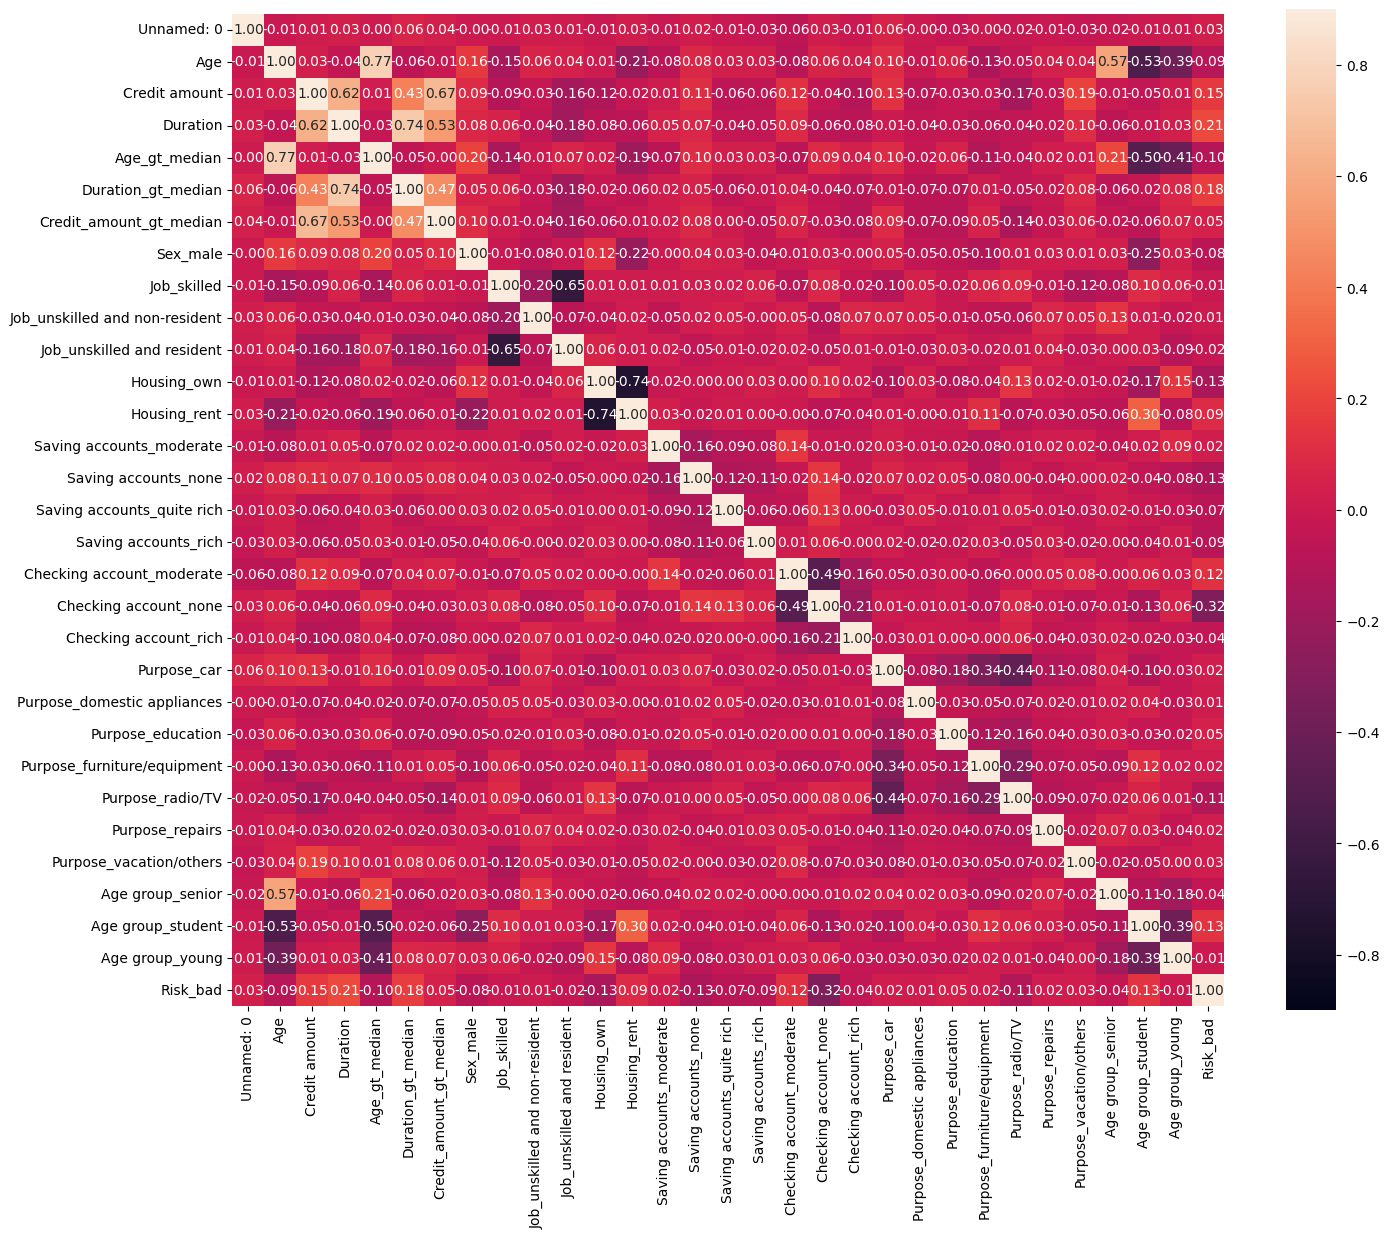

In [79]:
#Correlation analysis
corr = df_pre.corr()
plt.figure(figsize=(16, 13))
sns.heatmap(corr, annot=True, square=True, fmt=".2f", vmin=-0.9, vmax=0.9)
plt.show()

In [80]:
#As can be seen in the heatmap above, most of the relevant correlations are 
#between one-hot encoded features derivated from the same variable.

In [88]:
from sklearn.model_selection import train_test_split

X = df_pre.drop("Risk_bad", axis=1)
y = df_pre["Risk_bad"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#print(f"X_train: {X_train.shape}\nX_test: {X_test.shape}")
print(x_train.shape) # (80, 5)
print(x_test.shape) # (20, 5)
print(y_train.shape) # (80,)
print(y_test.shape) # (20,)

(800, 30)
(200, 30)
(800,)
(200,)


In [95]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from xgboost import XGBClassifier


models = {
    "LR": LogisticRegression(random_state=42, max_iter=10000),
    "CART": DecisionTreeClassifier(random_state=42),
    "NB": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "RF": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "XGB": XGBClassifier(),
}

#scoring = "recall"
scoring = "precesion"
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = []

for name, model in models.items():
    _scores = cross_val_score(model, X_train, y_train, scoring=scoring, cv=kfold, n_jobs=-1)
    msg = "%s has an average score of %.3f ± %.3f" % (name, np.mean(_scores), np.std(_scores))
    print(msg)
    scores.append(_scores)

LR has an average score of 0.729 ± 0.039
CART has an average score of 0.662 ± 0.036
NB has an average score of 0.694 ± 0.046
KNN has an average score of 0.649 ± 0.040
RF has an average score of 0.721 ± 0.036
SVM has an average score of 0.699 ± 0.004
XGB has an average score of 0.720 ± 0.047


In [90]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/11/6f/419545a6a344cfd1358a80c36a06431881d607830483ef63d7c38905cd22/xgboost-2.0.1-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB 435.7 kB/s eta 0:03:49
   ---------------------------------------- 0.1/99.7 MB 651.6 kB/s eta 0:02:33
   ---------------------------------------- 0.2/99.7 MB 1.4 MB/s eta 0:01:13
   ---------------------------------------- 0.6/99.7 MB 3.0 MB/s eta 0:00:34
    --------------------------------------- 1.4/99.7 MB 5.2 MB/s eta 0:00:19
   - -------------------------------------- 2.5/99.7 MB 8.4 MB/s eta 0:00:12
   - -------------------------------------- 3.0/99.7 MB 8.8 MB/s eta 0:00:11
   - -------------------------------------- 3.4/99.7 MB 9.5 MB/s eta 0:00:11
   -- -----------------------------


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


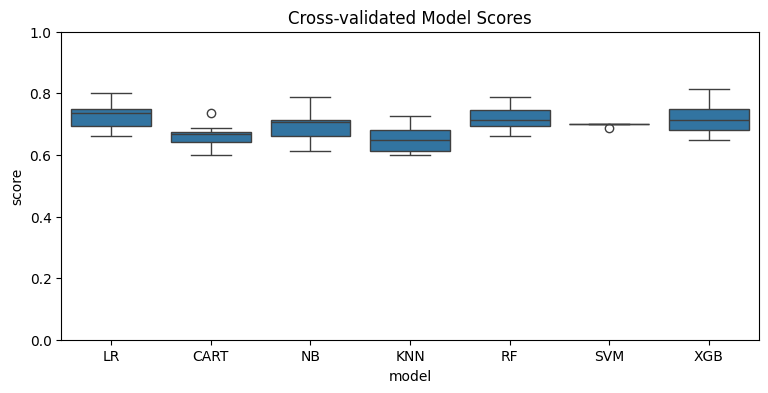

In [98]:
scores_df = pd.DataFrame(data=np.array(scores), index=list(models.keys())).reset_index().rename(columns=dict(index="model"))
scores_df = pd.melt(scores_df, id_vars=["model"], value_vars=np.arange(0, 10)).rename(columns=dict(variable="fold", value="score"))

plt.figure(figsize=(9, 4))
sns.boxplot(data=scores_df, x="model", y="score")
plt.title("Cross-validated Model Scores")
plt.ylim((0, 1))
plt.show()

In [ ]:
#Looks like the Naive Bayes, Decision Tree, LightGBM and XGBoost models were the bests methods. 
#Now we will perform hyperparameter tuning on each one of them in order to improve their performances.
#Hyperparameter tuning refers to the process of finding the optimal set of hyperparameters for a machine learning model.
#Hyperparameters are configuration settings external to the model itself and are not learned from the data during training. 
#They are set prior to training and can significantly impact the performance of a model.

In [100]:
from sklearn.metrics import precision_recall_curve, roc_curve, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    
    return accuracy, precision, recall, f1, roc_auc

def print_metrics(y_true, y_pred):
    accuracy, precision, recall, f1_score, roc_auc = metrics(y_true, y_pred)
    print("Accuracy: %.3f\nPrecision: %.3f\nRecall: %.3f\nF1 Score: %.3f\nROC AUC: %.3f" % (accuracy, precision, recall, f1_score, roc_auc))

def plot_curves(y_true, probas):
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    precision, recall, thresholds = precision_recall_curve(y_true, probas)
    plt.plot(recall, precision, color="b")
    plt.title("Precision-Recall Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")

    plt.subplot(122)
    fpr, tpr, tresholds = roc_curve(y_true, probas)
    plt.plot(fpr, tpr, color="g")
    plt.plot([0, 1], [0, 1], color="black", linestyle="--")
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.show()
    
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

Accuracy: 0.635
Precision: 0.405
Recall: 0.508
F1 Score: 0.451
ROC AUC: 0.598


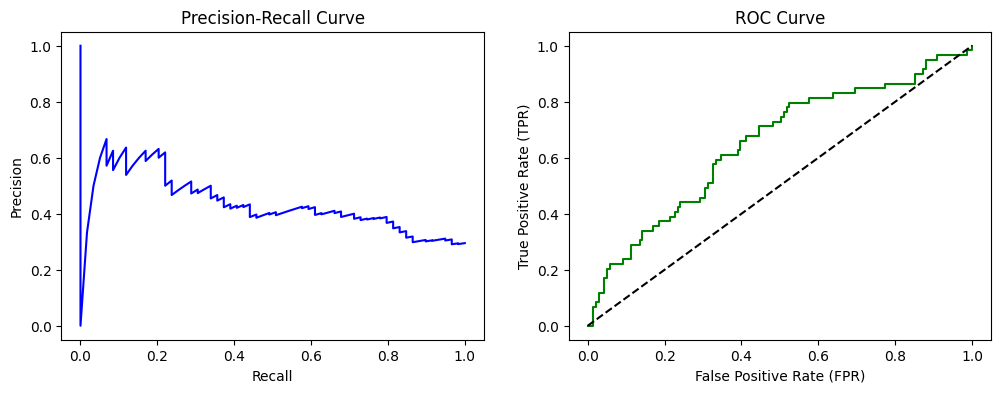

In [102]:
#Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)
probas = model.predict_proba(X_test)
print_metrics(y_test, model.predict(X_test))
plot_curves(y_test, probas[:, 1])

Accuracy: 0.745
Precision: 0.580
Recall: 0.492
F1 Score: 0.532
ROC AUC: 0.671


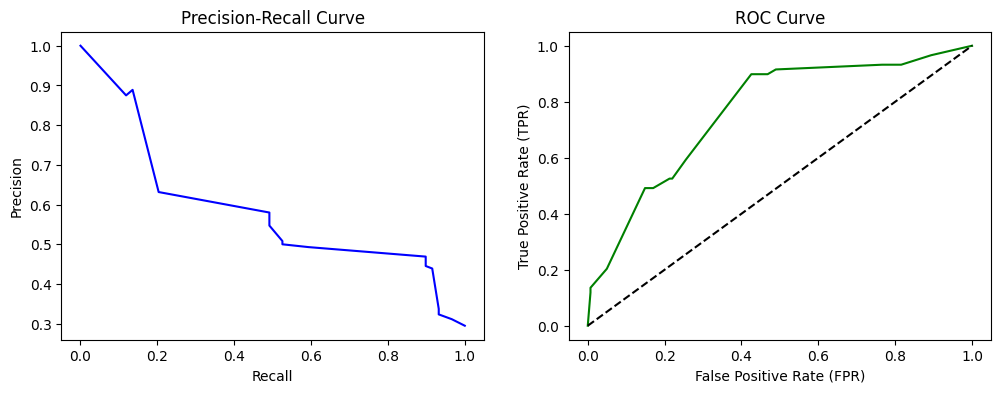

In [103]:
#Decision Tree
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state=42)
gscv = GridSearchCV(
    model,
    param_grid={
        "criterion": ["gini", "entropy", "log_loss"],
        "max_depth": np.arange(2, 6),
        "min_samples_split": np.arange(2, 100, 10),
        "max_features": ["sqrt", "log2", None]
    },
    scoring="recall",
    cv=kfold,
    n_jobs=-1
)
gscv.fit(X_train, y_train)
model = gscv.best_estimator_
probas = model.predict_proba(X_test)
print_metrics(y_test, model.predict(X_test))
plot_curves(y_test, probas[:, 1])

Accuracy: 0.715
Precision: 0.524
Recall: 0.373
F1 Score: 0.436
ROC AUC: 0.616


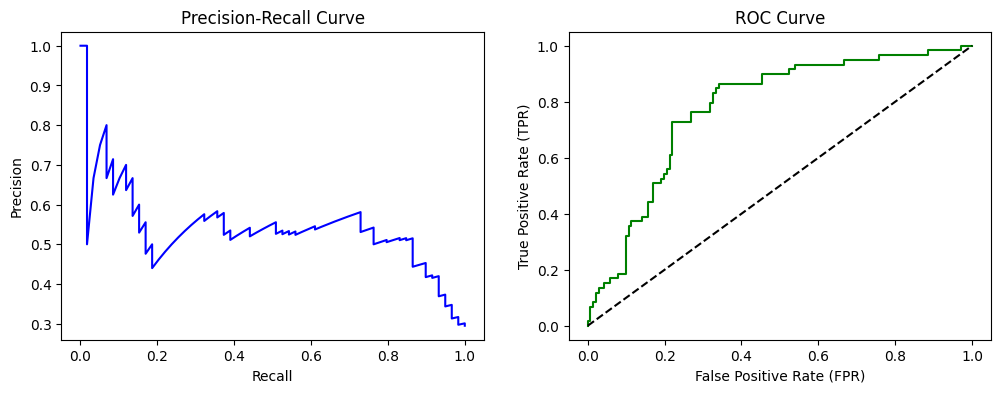

In [104]:
#XGBoost
model = XGBClassifier()
gscv = GridSearchCV(
    model,
    param_grid={
        "max_depth": np.arange(2, 6)
    },
    scoring="recall",
    cv=kfold,
    n_jobs=-1
)
gscv.fit(X_train, y_train)
model = gscv.best_estimator_
probas = model.predict_proba(X_test)
print_metrics(y_test, model.predict(X_test))
plot_curves(y_test, probas[:, 1])